## The Titanic survived Project

**Prepared for FLIP ROBO by Olumide Ikumapayi-2306**

## About The Titanic survived Project

The Titanic Project revolves around the sinking of the supposedly unsinkable ship, the Titanic, in early 1912. It presents data concerning various individuals, including their ages, genders, number of siblings, points of embarkment, and survival status during the disaster. We are therefore Using these variables to make predictions on whether a given passenger on the Titanic would have survived the sinking or not.For more information you can check the link to the dataset via-:https://github.com/dsrscientist/dataset1/blob/master/titanic_train.csv

The flow of this machine learning exercise is as follows:

1. [Import Necessary Libraries and Loading the Titanic Dataset ](#Import-Necessary-Libraries-and-Loading-the-Titanic-Dataset)
2. [Exploratory Data Analysis and Data Preprocessing](#Exploratory-Data-Analysis-and-Data-Preprocessing)
3. [Data Visualization](#Data-Visualization)
4. [Spliting Data into Training and Testing Sets](#Spliting-Data-into-Training-and-Testing-Sets)
5. [The Machine Learning Models and Predictions](#The-Machine-Learning-Models-and-Predictions)

## Import Necessary Libraries and Loading the Titanic Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import xgboost as xgb
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

## Exploratory Data Analysis and Data Preprocessing

In [2]:
# URL to the raw CSV file on GitHub
url = "https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv"

# Reading the CSV file into a DataFrame
titanic_train = pd.read_csv(url)

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv") 
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
#Checking the dimension of the dataset
df.shape

(891, 12)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
# Checking the columns of dataset
df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [7]:
# checking the types of columns
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

This dataset contains 891 rows and 8 columns.Out of which 1 is target variable and the remaining 7 are independent varbiables.

In [8]:
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [9]:
df.tail(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
861,862,0,2,"Giles, Mr. Frederick Edward",male,21.0,1,0,28134,11.5000,NaN,S
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
864,865,0,2,"Gill, Mr. John William",male,24.0,0,0,233866,13.0000,NaN,S
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,NaN,S
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S
870,871,0,3,"Balkic, Mr. Cerin",male,26.0,0,0,349248,7.8958,NaN,S


In [10]:
# Exploring the dataset
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**The Titanic Data**:
   
   The Titanic dataset has 11 feature columns and a target column(Survived) which is a binary variable-: Survival(1=Survived and 0 for Not Survived).
   
The features according to the Dataset are :

* **PassengerId**: This is a unique identifier for each passenger and does not contain any predictive information.

* **Pclass**:(A categorical feature) This column represents the passenger class. It is has three values (1, 2, 3), indicating first, second, or third class.

* **Name**:(A text feature) This column contains the names of the passengers. 

* **Sex**:(A categorical feature) This column represents the gender of the passenger, either male or female. 

* **Age**:(A numerical feature) This column contains the age of the passengers. It is an important predictor of survival.

* **SibSp**:(A numerical feature) This column represents the number of siblings or spouses (SibSp) the passenger had aboard the Titanic.

* **Parch**:(A numerical feature) This column represents the number of parents or children (Parch) the passenger had aboard the Titanic. 

* **Ticket**: This column contains the ticket number of the passenger. It's a combination of letters. 

* **Fare**:(A numerical feature) This column represents the fare (ticket price) the passenger paid for the journey. It could be related to passenger class.

* **Cabin**: This column contains the cabin number of the passenger. It is often incomplete (NaN values) and may not be very informative.

* **Embarked**:(A categorical feature) This column represents the port of embarkation, where the passenger boarded the Titanic (C = Cherbourg, Q = Queenstown, S = Southampton). 


* **Survived**: This is the target variable column which indicates whether a passenger survived the Titanic disaster (1) or did not survive, benign(0).




In [11]:
#Column types
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There three(3) different types of data(int64,object and float) present in the dataset.

#np.nan,None,NaN,others

# Description of Dataset

In [12]:
# Statistical summary of numerical columns
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
#checking the null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**This gives statistical information of the numerical columns.The summary of the dataset shows that some columns have fewer non-null values than the total number of rows (891)**. 

From the above description, we can observe the following-:

1. The counts of missing values for each of the mentioned columns:

* **Age**: There are 714 non-null values, which means there are 177 missing values for the "Age" column.
* **Cabin**: The "Cabin" column has a significant number of missing values. In this case, only 204 non-null values are present, while 687 values are missing.


In [14]:
df.isnull().sum().sum()

866

In [15]:
# Droping irrelevant columns/columns with too many missing values
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [16]:
# Filling missing values in the 'Age' and 'Embarked' columns
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [17]:
# Encoding categorical features (e.g., 'Sex' and 'Embarked') into numerical values
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

## Data Visualization

<AxesSubplot:>

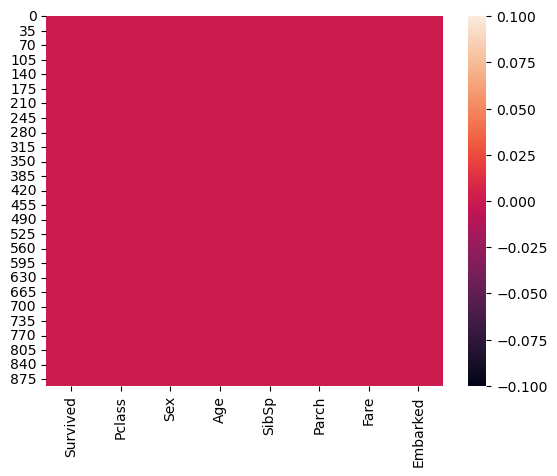

In [18]:
#Lets visualize it using heatmap
sns.heatmap(df.isnull())

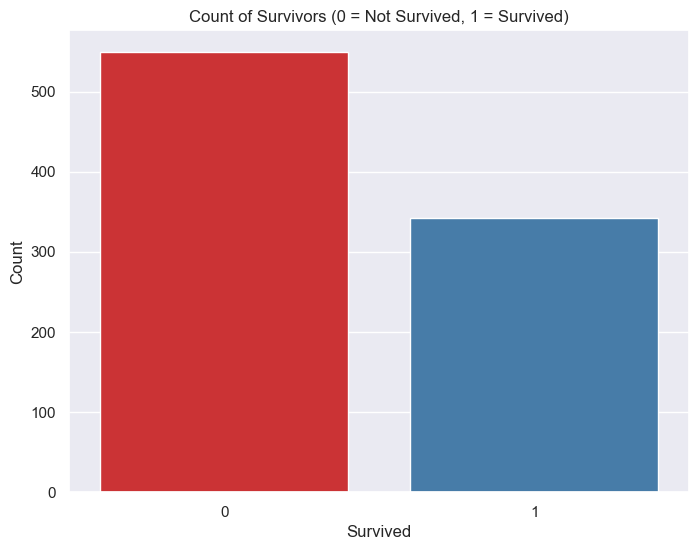

In [19]:
# Countplot of survivors
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=df, palette='Set1')
plt.title('Count of Survivors (0 = Not Survived, 1 = Survived)')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

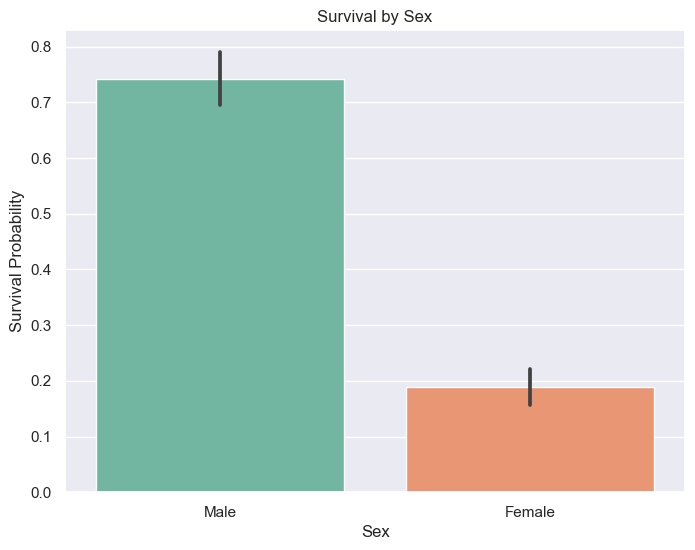

In [20]:
# Barplot of survival by sex
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=df, palette='Set2')
plt.title('Survival by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Probability')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

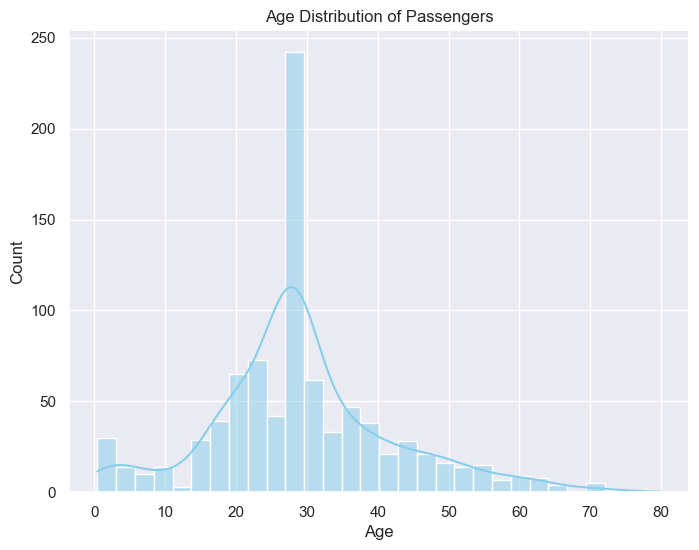

In [21]:
# Age distribution of passengers
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'].dropna(), kde=True, color='skyblue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

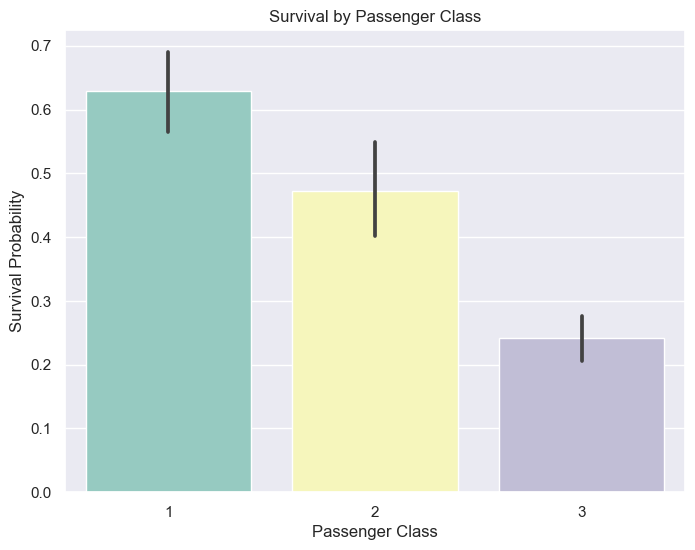

In [22]:
# Survival by passenger class (Pclass)
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=df, palette='Set3')
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Probability')
plt.show()

## Spliting Data into Training and Testing Sets

In [23]:
# Spliting the data into training and testing sets
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## The Machine Learning Models and Predictions

## Random Forest Classifier

In [24]:
# Creating a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
# Making predictions on the test set
y_pred = clf.predict(X_test)

In [26]:
# Predicted probabilities for the positive class (class 1)
y_prob = clf.predict_proba(X_test)[:, 1]

In [27]:
# Calculating ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

In [28]:
# Printing the ROC-AUC score
print(f'ROC-AUC Score: {roc_auc:.2f}')

ROC-AUC Score: 0.90


Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



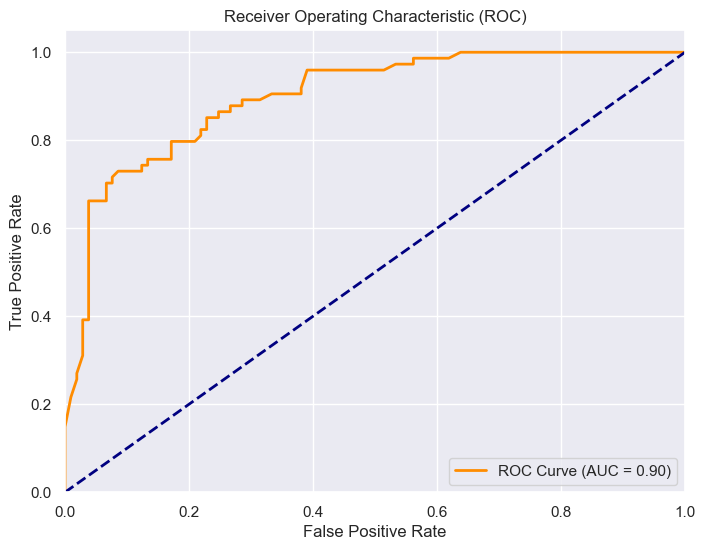

In [29]:
# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generating a classification report for more detailed evaluation
print(classification_report(y_test, y_pred))

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

## XGBoost Classifier

In [30]:
# Creating an XGBoost Classifier
clf_xgb = xgb.XGBClassifier(objective="binary:logistic", random_state=42)


In [31]:
# Training the model
clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [32]:
# Making predictions on the test set
y_pred_xgb = clf_xgb.predict(X_test)

In [33]:
# Predicted probabilities for the positive class (class 1)
y_prob_xgb = clf_xgb.predict_proba(X_test)[:, 1]

In [34]:
# Calculating ROC curve and AUC
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

In [35]:
# Printing the ROC-AUC score
print(f'XGBoost ROC-AUC Score: {roc_auc_xgb:.2f}')

XGBoost ROC-AUC Score: 0.87


XGBoost Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       105
           1       0.75      0.76      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179



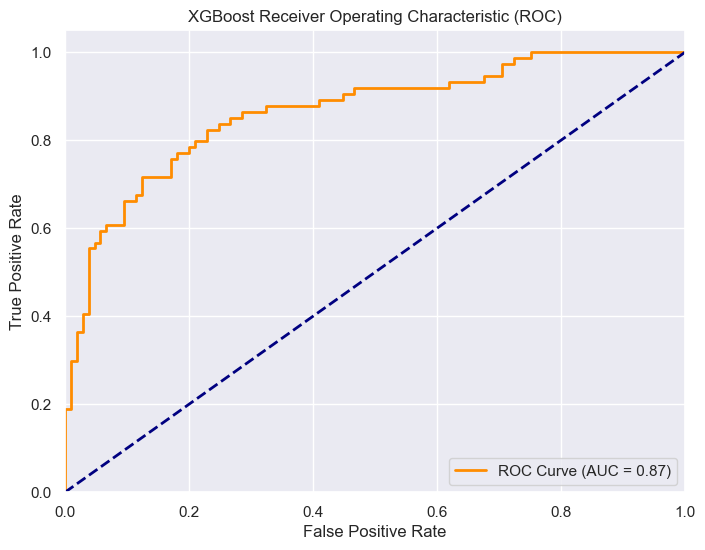

In [36]:
# Calculating the accuracy and generating a classification report
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb:.2f}')
print(classification_report(y_test, y_pred_xgb))

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

## k-Nearest Neighbors (KNN)

In [37]:
# features Standardization(This is important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
# Creating a KNN Classifier
clf_knn = KNeighborsClassifier(n_neighbors=5)

In [39]:
# Training the model 
clf_knn.fit(X_train, y_train)


KNeighborsClassifier()

In [40]:
# Creating and fiting the KNN Classifier model
knn = KNeighborsClassifier(n_neighbors=3)  # The number of neighbors can be adjusted as deemed fit 
knn.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=3)

In [41]:
# Predicting labels on the test dataset
y_pred_knn = knn.predict(X_test)  # Assuming X_test is the test data

In [42]:
# Calculating the ROC curve and AUC
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Printing the ROC-AUC score
print(f'KNN Classifier ROC-AUC Score: {roc_auc_knn:.2f}')

KNN Classifier ROC-AUC Score: 0.77


KNN Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       105
           1       0.75      0.72      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



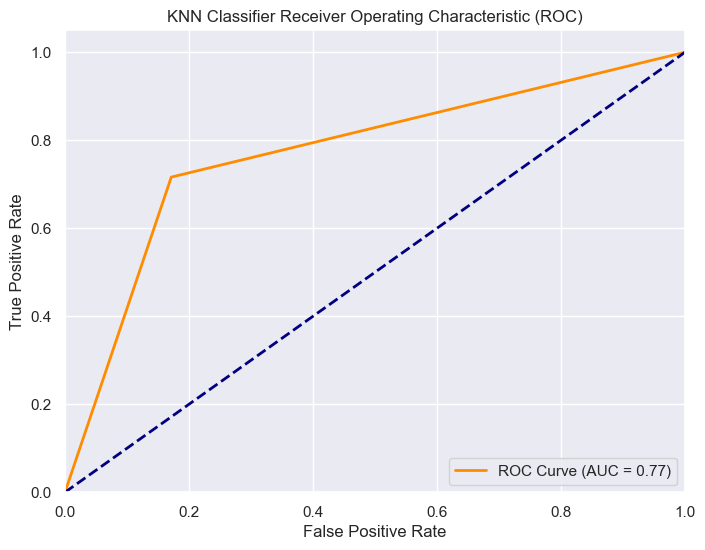

In [43]:
# Calculating the accuracy and generate a classification report
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn:.2f}')
print(classification_report(y_test, y_pred_knn))

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN Classifier Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

## Summary and Conclusion

To assess the overall performance of the models, metrics such as F1-Accuracy and ROC-AUC are utilized. F1-Accuracy combines the F1-scores for both classes into a single measurement, while ROC-AUC evaluates the model's ability to differentiate between the classes. The Random Forest Classifier exhibits superior precision and recall for class 0, yielding the highest overall F1-score (0.85). Additionally, it achieves the highest ROC-AUC (0.90), indicating excellent discriminatory capabilities. XGBoost demonstrates satisfactory precision and recall for both classes, with decent F1-scores (0.82 for class 0 and 0.75 for class 1) and a good ROC-AUC score of 0.87. The KNN Classifier showcases respectable precision and recall values, albeit with slightly lower F1-scores than the other models (0.82 for class 0 and 0.73 for class 1). Its ROC-AUC score is also lower at 0.77. In conclusion, the Random Forest Classifier emerges as the leading model in terms of F1-score and ROC-AUC, making it a robust choice for this classification task. 